In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, "../utils/")
import Stimuli, Pyr

In [2]:
data_dir = '../data/morpho/reconstruct/'

In [61]:
stim_locs_file = '../data/morpho/segment_arrays/segment_array_0.3Hz_ID11.npy'
print(stim_locs_file)

stim_params = Stimuli.ExperimentalStimParams()
stim_scaffold = stim_params.stim_scaffold['pyr']
stim_locs = np.load(stim_locs_file)

stimuli_sets = [
    Stimuli.MorphoStimuli(
        f'stimset',
        stim_scaffold['stim_type_array'],
        stim_locs, stim_scaffold,
        duration
    ) for i in range(n)]

../data/morpho/segment_arrays/segment_array_0.3Hz_ID11.npy


In [70]:
stimuli_sets[2].stimuli[0].event_times

[94.30776577912711,
 151.31349561311526,
 166.411132337711,
 176.22737757121604,
 240.73692666501495,
 315.1814678130597,
 423.48250490820305,
 431.12472263722185,
 434.7082422289309,
 460.9420344877026,
 489.8100426641928,
 579.93814127831,
 651.6865197350546,
 668.6258381014308,
 713.9463107288694,
 762.2208251111201,
 767.8494150625716,
 781.997852268982,
 789.7136525498831,
 852.0359600972101,
 887.8055398959397]

In [3]:
files = os.listdir(data_dir)
seglocIDs = list(set([file.split('_')[2] for file in files]))
reconstruct_pairs = []
for file in files:
    if 'origin' in file:
        pairfile = 'reconstruct'+file.strip('origin')
        if pairfile in files:
            reconstruct_pairs.append((file, pairfile))
reconstruct_pairs

[('origin_v_ID87_1.npy', 'reconstruct_v_ID87_1.npy'),
 ('origin_v_ID92_1.npy', 'reconstruct_v_ID92_1.npy'),
 ('origin_v_ID70_0.npy', 'reconstruct_v_ID70_0.npy'),
 ('origin_v_ID87_0.npy', 'reconstruct_v_ID87_0.npy'),
 ('origin_v_ID84_1.npy', 'reconstruct_v_ID84_1.npy'),
 ('origin_v_ID88_0.npy', 'reconstruct_v_ID88_0.npy'),
 ('origin_v_ID96_1.npy', 'reconstruct_v_ID96_1.npy'),
 ('origin_v_ID99_1.npy', 'reconstruct_v_ID99_1.npy'),
 ('origin_v_ID19_1.npy', 'reconstruct_v_ID19_1.npy'),
 ('origin_v_ID90_1.npy', 'reconstruct_v_ID90_1.npy'),
 ('origin_v_ID48_1.npy', 'reconstruct_v_ID48_1.npy'),
 ('origin_v_ID71_1.npy', 'reconstruct_v_ID71_1.npy'),
 ('origin_v_ID21_1.npy', 'reconstruct_v_ID21_1.npy'),
 ('origin_v_ID99_0.npy', 'reconstruct_v_ID99_0.npy'),
 ('origin_v_ID36_0.npy', 'reconstruct_v_ID36_0.npy'),
 ('origin_v_ID48_0.npy', 'reconstruct_v_ID48_0.npy'),
 ('origin_v_ID50_0.npy', 'reconstruct_v_ID50_0.npy'),
 ('origin_v_ID55_0.npy', 'reconstruct_v_ID55_0.npy'),
 ('origin_v_ID2_1.npy', 'rec

In [4]:
vs_means = {}
for origin_file, reconstruct_file in reconstruct_pairs:
    seglocID = origin_file.split('_')[2]
    ind = origin_file.split('_')[3].strip('.npy')
    reconstruct_vs = np.load(f'{data_dir}{reconstruct_file}')
    origin_vs = np.load(f'{data_dir}{origin_file}')
    print(f'{origin_file}:{origin_vs.shape}')
    print(f'{reconstruct_file}:{reconstruct_vs.shape}')
    print()
    vs_dif = np.abs(origin_vs - reconstruct_vs)
    vs_means[seglocID+'_'+ind] = np.mean(vs_dif, axis=0)

origin_v_ID87_1.npy:(50, 974, 8001)
reconstruct_v_ID87_1.npy:(50, 974, 8001)

origin_v_ID92_1.npy:(50, 974, 8001)
reconstruct_v_ID92_1.npy:(50, 974, 8001)

origin_v_ID70_0.npy:(50, 974, 8001)
reconstruct_v_ID70_0.npy:(50, 974, 8001)

origin_v_ID87_0.npy:(50, 974, 8001)
reconstruct_v_ID87_0.npy:(50, 974, 8001)

origin_v_ID84_1.npy:(50, 974, 8001)
reconstruct_v_ID84_1.npy:(50, 974, 8001)

origin_v_ID88_0.npy:(50, 974, 8001)
reconstruct_v_ID88_0.npy:(50, 974, 8001)

origin_v_ID96_1.npy:(50, 974, 8001)
reconstruct_v_ID96_1.npy:(50, 974, 8001)

origin_v_ID99_1.npy:(50, 974, 8001)
reconstruct_v_ID99_1.npy:(50, 974, 8001)

origin_v_ID19_1.npy:(50, 974, 8001)
reconstruct_v_ID19_1.npy:(50, 974, 8001)

origin_v_ID90_1.npy:(50, 974, 8001)
reconstruct_v_ID90_1.npy:(50, 974, 8001)

origin_v_ID48_1.npy:(50, 974, 8001)
reconstruct_v_ID48_1.npy:(50, 974, 8001)

origin_v_ID71_1.npy:(50, 974, 8001)
reconstruct_v_ID71_1.npy:(50, 974, 8001)

origin_v_ID21_1.npy:(50, 974, 8001)
reconstruct_v_ID21_1.npy:(50

In [13]:
pyr = Pyr.Pyr()

In [60]:
50*22

1100

In [14]:
pyr.all_seg_locs

['soma',
 'axon',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'basal',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic',
 'apic

In [5]:
vs_dif = origin_vs - reconstruct_vs

In [6]:
vs_mean = np.mean(vs_dif, axis=0)

In [7]:
vs_means_agg = np.array(list(vs_means.values()))
vs_means_agg = np.mean(vs_means_agg, axis=0)

In [24]:
section_locations = []
for seg in pyr.all_segs:
    for sec in seg:
        section_locations.append(seg.hname().split('.')[1].split('[')[0])

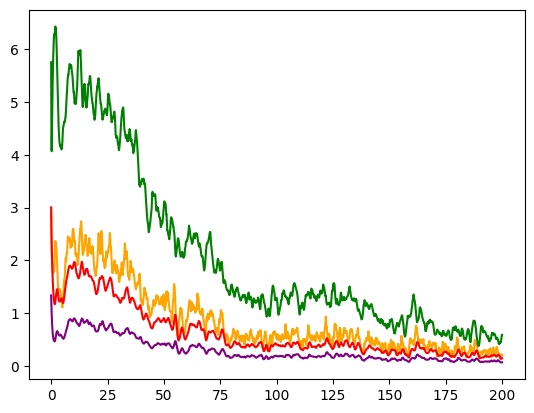

In [46]:
section_location2color = {
    'soma':'orange',
    'axon':'green',
    'apic':'purple',
    'basal':'red'
}

vs_means_by_sec = {
    'soma':[],
    'axon':[],
    'apic':[],
    'basal':[]
}
for i, section_location in enumerate(section_locations):
    #plt.plot(_t, vs_means_agg[i,:], color=section_location2color[section_location], alpha=0.5)
    vs_means_by_sec[section_location].append(vs_means_agg[i,:])

vs_means_by_sec['soma'] = np.mean(np.array(vs_means_by_sec['soma']), axis=0)
vs_means_by_sec['axon'] = np.mean(np.array(vs_means_by_sec['axon']), axis=0)
vs_means_by_sec['apic'] = np.mean(np.array(vs_means_by_sec['apic']), axis=0)
vs_means_by_sec['basal'] = np.mean(np.array(vs_means_by_sec['basal']), axis=0)

plt.plot(_t, vs_means_by_sec['soma'], color=section_location2color['soma'])
plt.plot(_t, vs_means_by_sec['axon'], color=section_location2color['axon'])
plt.plot(_t, vs_means_by_sec['apic'], color=section_location2color['apic'])
plt.plot(_t, vs_means_by_sec['basal'], color=section_location2color['basal'])


plt.show()

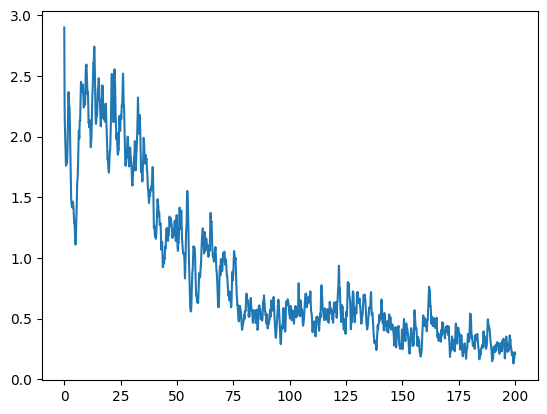

In [9]:
_t = np.arange(0,200.025, .025)
plt.plot(_t, vs_means_agg[0])